In [3]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes
import numpy as np

In [4]:
nusc = NuScenes(version='v1.0-mini', dataroot='data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.679 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [5]:
nusc.list_scenes()

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

In [6]:
for i in range(len(nusc.scene)):
    my_scene = nusc.scene[i]
    description = my_scene['description']
    nbr_samples = my_scene['nbr_samples']
    print(description, ":", nbr_samples, "samples")

Parked truck, construction, intersection, turn left, following a van : 39 samples
Many peds right, wait for turning car, long bike rack left, cyclist : 40 samples
Wait at intersection, bicycle, large truck, peds crossing crosswalk, ped with stroller : 41 samples
Parking lot, parked cars, jaywalker, bendy bus, gardening vehicles : 41 samples
Arrive at busy intersection, bus, wait at intersection, bicycle, peds : 41 samples
Scooter, peds on sidewalk, bus, cars, truck, fake construction worker, bicycle, cross intersection, car overtaking us : 40 samples
Parking lot, bicycle rack, parked bicycles, bus, many peds, parked scooters, parked motorcycle : 41 samples
Night, big street, bus stop, high speed, construction vehicle : 41 samples
Night, after rain, many peds, PMD, ped with bag, jaywalker, truck, scooter : 40 samples
Night, peds in sidewalk, peds cross crosswalk, scooter, PMD, difficult lighting : 40 samples


In [7]:
first_sample_token = my_scene['first_sample_token']
# The rendering command below is commented out because it tends to crash in notebooks
# nusc.render_sample(first_sample_token)
my_sample = nusc.get('sample', first_sample_token)
my_sample

{'token': 'a480496a5988410fbe3d8ed6c84da996',
 'timestamp': 1542800987947699,
 'prev': '',
 'next': 'b993550e60054741983f8052ba97b0b0',
 'scene_token': 'e233467e827140efa4b42d2b4c435855',
 'data': {'RADAR_FRONT': '511dba7f4aec41ea8baa9019ba97413c',
  'RADAR_FRONT_LEFT': 'b5a62f9cf0ac444cbd90c2f9ba7fedbf',
  'RADAR_FRONT_RIGHT': 'e95132afd0604448b6d522a09bad7e2d',
  'RADAR_BACK_LEFT': 'cb1a9aa2b8154fde9442eaa9fe11a958',
  'RADAR_BACK_RIGHT': 'f2008e1cb0194ee49a85243ed8261955',
  'LIDAR_TOP': 'b723df2123fe473d85512c9d02156c27',
  'CAM_FRONT': '51ceae8a5ecc4730950666723c135bc8',
  'CAM_FRONT_RIGHT': '4a85ae2a6329487abed596b0b7b6dfa4',
  'CAM_BACK_RIGHT': '646b51a45a2b4494a918ff89d36027e2',
  'CAM_BACK': 'd340a8d85c874b8d9e9ddf51a82a5908',
  'CAM_BACK_LEFT': 'c418396afb5a43a4af9a3b76278fd8d6',
  'CAM_FRONT_LEFT': '255a0637ea9a461989d7fb20f4ee126c'},
 'anns': ['9ca2a9ab9b5041278eea928681e09d89',
  '9dfee0c127f548acb80bf95610437acb',
  'b2222d3c49c447ba91247501e97d772b',
  '723bee443cf6433a9

In [9]:
my_instance = nusc.instance[27]
print(my_instance)
first_token = my_instance['first_annotation_token']
last_token = my_instance['last_annotation_token']
nbr_samples = my_instance['nbr_annotations']
current_token = first_token

i = 0
found_change = False
while current_token != last_token:
    current_ann = nusc.get('sample_annotation', current_token)
    current_attr = nusc.get('attribute', current_ann['attribute_tokens'][0])['name']
    
    if i == 0:
        pass
    elif current_attr != last_attr:
        print("Changed from `{}` to `{}` at timestamp {} out of {} annotated timestamps".format(last_attr, current_attr, i, nbr_samples))
        found_change = True

    next_token = current_ann['next']
    current_token = next_token
    last_attr = current_attr
    i += 1

{'token': 'bbd6c47a20e34276bc6f2cfbc6ba6205', 'category_token': '1fa93b757fc74fb197cdd60001ad8abf', 'nbr_annotations': 39, 'first_annotation_token': 'e4a3582721c34f528e3367f0bda9485d', 'last_annotation_token': 'f97a9af2e14e4facbe5c07b139793964'}
Changed from `pedestrian.moving` to `pedestrian.standing` at timestamp 21 out of 39 annotated timestamps


Visibility: {'description': 'visibility of whole object is between 80 and 100%', 'token': '4', 'level': 'v80-100'}


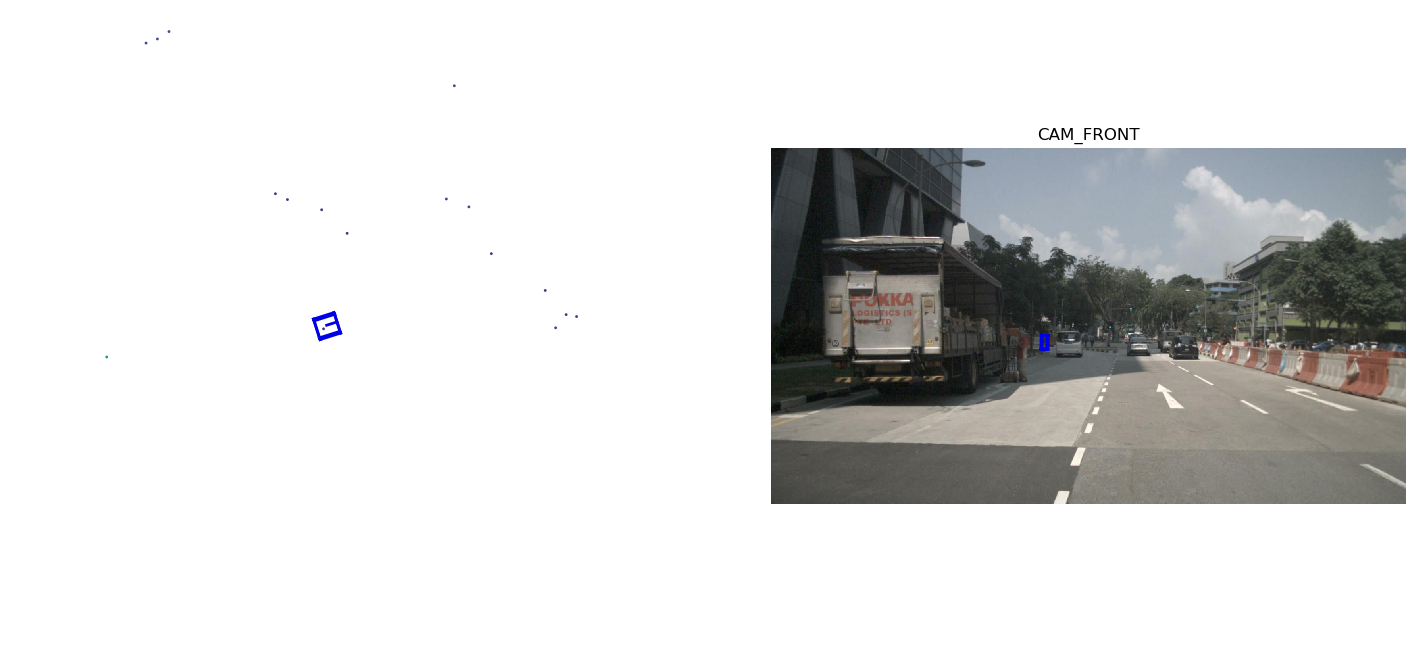

In [10]:
my_instance = nusc.instance[27]
first_token = my_instance['first_annotation_token']
last_token = my_instance['last_annotation_token']
nbr_samples = my_instance['nbr_annotations']
current_token = first_token

i = 0
while current_token != last_token:
    
    visibility_token = nusc.get('sample_annotation', current_token)['visibility_token']

    print("Visibility: {}".format(nusc.get('visibility', visibility_token)))
    nusc.render_annotation(current_token)
    
    next_token = current_ann['next']
    current_token = next_token
    i += 1

In [11]:
sensor = 'CAM_FRONT_RIGHT'

sample_data = nusc.sample_data[10]
cal_sens = sample_data['calibrated_sensor_token']
ego_sens = sample_data['ego_pose_token']

cal_sensor = np.array(nusc.get('calibrated_sensor', cal_sens)['translation'])
ego_pose = np.array(nusc.get('ego_pose', cam_front_data['ego_pose_token'])['translation'])

print(cal_sensor - ego_pose)
nusc.render_sample_data(sample_data['token'])

cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])

# get calibrated sensor translation
cal_sensor_token = nusc.get('calibrated_sensor', cam_front_data['calibrated_sensor_token'])
cal_sensor_translation = cal_sensor_token['translation']
cal_sensor_translation = np.array(cal_sensor_translation)

# get ego pose sensor translation
ego_pose = nusc.get('ego_pose', cam_front_data['ego_pose_token'])
ego_pose_translation = ego_pose['translation']
ego_pose_translation = np.array(ego_pose_translation)

#understand what this value means
print(cal_sensor_translation - ego_pose_translation)
nusc.render_sample_data(cam_front_data['token'])

NameError: name 'cam_front_data' is not defined

In [12]:
sample_data_token = my_sample['data']['CAM_FRONT']
sample_data = nusc.get('sample_data', sample_data_token)
sample_data_token_prev = sample_data['prev']
sample_data_token_next = sample_data['next']

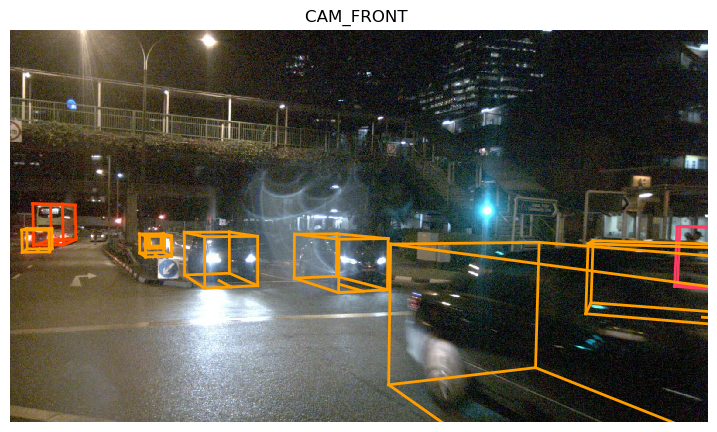

In [13]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

nusc.render_sample_data(cam_front_data['token'])
# translation of annotation
# translation of ego pose

In [14]:
cal_sensor = nusc.calibrated_sensor[0]['translation']
ego_pose = nusc.ego_pose[0]['translation']
print(cal_sensor, ego_pose)
trans_diff = []
for i in range(3):
    val = cal_sensor[i]-ego_pose[i]
    trans_diff.append(val)
trans_diff

[3.412, 0.0, 0.5] [410.77878632230204, 1179.4673290964536, 0.0]


[-407.36678632230206, -1179.4673290964536, 0.5]

In [15]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data
cal = nusc.get('calibrated_sensor', cam_front_data['calibrated_sensor_token'])
print(cal['translation'])
ego_pose2 = nusc.get('ego_pose', cam_front_data['ego_pose_token'])
ego_pose2_translation = ego_pose2['translation']
arr = np.array(ego_pose2_translation)
print(arr)
cal_sensor = np.array(nusc.calibrated_sensor[0]['translation'])
print(cal_sensor)
# explain ego pose in background chapter

[1.70079118954, 0.0159456324149, 1.51095763913]
[1321.39078511  903.75474191    0.        ]
[3.412 0.    0.5  ]


In [27]:
#Finding velocity from scenes

sample_data_token = my_sample['data']['CAM_FRONT']
sample_data = nusc.get('sample_data', sample_data_token)

sample_data_token_prev = sample_data['prev']
sample_data_token_next = sample_data['next']

# Start and end values
if not sample_data_token_next:
    sample_data_token_next = sample_data_token
    
if not sample_data_token_prev:
    sample_data_token_prev = sample_data_token
    
#chack if there are no previous or next ann as there will be no velocity 
if not sample_data_token_prev or sample_data_token_next:
    velocity[velocity==0] = np.nan

velocity = np.zeros(3)

sample_data_prev = nusc.get('sample_data', sample_data_token_prev)
sample_data_next = nusc.get('sample_data', sample_data_token_next)

ego_pose_prev = nusc.get('ego_pose', sample_data_prev['ego_pose_token'])
ego_pose_next = nusc.get('ego_pose', sample_data_next['ego_pose_token'])

ego_pose_trans_prev = np.array(ego_pose_prev['translation'])
ego_pose_trans_next = np.array(ego_pose_prev['translation'])

time_change = ego_pose_next['timestamp'] - ego_pose_prev['timestamp']
print(time_change)

trans_change = ego_pose_trans_next - ego_pose_trans_prev
print(trans_change)

if time_change == 0:
    pass
else:
    velocity = trans_change / time_change
velocity

100000
[0. 0. 0.]


array([0., 0., 0.])